In [4]:
import numpy as np

In [5]:
class ScratchLinearRegression:
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : of the following form. ndarray, shape (n_features,)
      Parameters
    self.loss : of the following form. ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : of the following form. ndarray, shape (self.iter,)
      Record loss on validation data

    self.theta : 
    """
    def __init__(self, num_iter, no_bias, lr, verbose):
        self.num_iter = num_iter
        self.no_bias = no_bias
        self.lr = lr
        self.verbose = verbose

        #attributes
        #self.coef_ = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])
        self.theta = np.array([])

    def fit(x_train, y_train):
        pass
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : of the following form. ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : of the following form. ndarray, shape (n_samples, )
            Correct value of verification data
        """

        if self.no_bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])

            if X_val != None:
                a = np.ones(X_val.shape[0]).reshape((-1,1))
                X_val = np.hstack([a, X_val])
        pred = 0
        self.theta = np.zeros(X.shape[1]).reshape((-1, 1))
        
        for i in range(self.num_iter):
            pred =  self._linear_hypothesis(X) 

            self.gradient_descent(X, y)      
            mse = self.MSE(pred, y)
            self.loss = np.append(self.loss, mse)
            if self.verbose:
                #Output learning process when verbose is set to True
                print(f"At {i} iteration learning mse {mse}")
        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            of the following form. ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        pred = self._linear_hypothesis(X)

        pred = pred.reshape((-1, 1))
        return pred

    def _linear_hypothesis(self, x):
        """
        Compute a linear hypothetical function

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
        Training data

        Returns
        -------
        of the following form. ndarray, shape (n_samples, 1)
        Estimated result by linear hypothetical function

        """
        return x @ self.theta
    
    def gradient_descent(self, x, y):
        """
        Compute the hypothetical values of the linear function

        Parameters
        ------
        x: Features for model training
        y: Target variable

        Returns
        ------
        None
        """
        rows = x.shape[0]
        columns = x.shape[1]
        pred = self._linear_hypothesis(x)

        for column in range(columns):
            gradient = np.array([])
            for row in range(rows):
                a = (pred[row] - y[row]) * x[row, column]
                gradient = np.append(gradient, a)
            gradient = gradient.sum()
            self.theta[column] = self.theta[column] - ((self.lr * gradient)/rows)
    
    def MSE(self, y_pred, y):
        """
        Calculation of mean square error

        Parameters
        ----------
        y_pred : of the following form. ndarray, shape (n_samples,)
        Estimated value
        y : of the following form. ndarray, shape (n_samples,)
        Correct answer value

        Returns
        ----------
        mse : numpy.float
        Mean squared error
        """
        mse = np.sum((y_pred - y)**2)/ (2*y.shape[0])

        return mse
    
    
                
                
    


    


In [13]:
model = ScratchLinearRegression(100, False, 1e-5, False)

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [8]:
x_train.shape

(120, 4)

In [14]:
model.fit(x_train, y_train)

In [15]:
model.theta

array([[0.00655096],
       [0.0029763 ],
       [0.00531928],
       [0.00185899]])

In [16]:
model.loss

array([107.5       , 107.40781003, 107.31574439, 107.22380291,
       107.13198544, 107.04029181, 106.94872187, 106.85727545,
       106.7659524 , 106.67475255, 106.58367574, 106.49272182,
       106.40189063, 106.311182  , 106.22059577, 106.1301318 ,
       106.03978991, 105.94956996, 105.85947178, 105.76949522,
       105.67964011, 105.58990631, 105.50029364, 105.41080197,
       105.32143112, 105.23218094, 105.14305128, 105.05404198,
       104.96515289, 104.87638384, 104.78773468, 104.69920526,
       104.61079541, 104.522505  , 104.43433385, 104.34628182,
       104.25834875, 104.17053449, 104.08283889, 103.99526178,
       103.90780301, 103.82046244, 103.73323991, 103.64613526,
       103.55914834, 103.472279  , 103.38552709, 103.29889246,
       103.21237495, 103.1259744 , 103.03969068, 102.95352362,
       102.86747308, 102.7815389 , 102.69572093, 102.61001903,
       102.52443304, 102.43896281, 102.35360819, 102.26836904,
       102.18324519, 102.0982365 , 102.01334283, 101.92

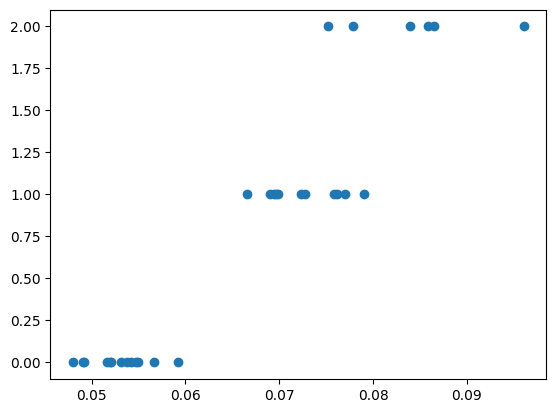

In [19]:
pred = model.predict(x_test)
plt.scatter(pred, y_test)

In [23]:
from sklearn.metrics import mean_squared_error


mean_squared_error(y_test, pred)

1.0506799261165285

In [24]:
model.loss

array([107.5       , 107.40781003, 107.31574439, 107.22380291,
       107.13198544, 107.04029181, 106.94872187, 106.85727545,
       106.7659524 , 106.67475255, 106.58367574, 106.49272182,
       106.40189063, 106.311182  , 106.22059577, 106.1301318 ,
       106.03978991, 105.94956996, 105.85947178, 105.76949522,
       105.67964011, 105.58990631, 105.50029364, 105.41080197,
       105.32143112, 105.23218094, 105.14305128, 105.05404198,
       104.96515289, 104.87638384, 104.78773468, 104.69920526,
       104.61079541, 104.522505  , 104.43433385, 104.34628182,
       104.25834875, 104.17053449, 104.08283889, 103.99526178,
       103.90780301, 103.82046244, 103.73323991, 103.64613526,
       103.55914834, 103.472279  , 103.38552709, 103.29889246,
       103.21237495, 103.1259744 , 103.03969068, 102.95352362,
       102.86747308, 102.7815389 , 102.69572093, 102.61001903,
       102.52443304, 102.43896281, 102.35360819, 102.26836904,
       102.18324519, 102.0982365 , 102.01334283, 101.92